# Boston Housing Dataset

### Objective: To generate an optimal model based on statistical analysis with the tools available to estimate the best selling price for the client's home.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("housing.csv")

In [3]:
data.head()

,RM,LSTAT,PTRATIO,MEDV
0,6.575,4.98,15.3,504000.0
1,6.421,9.14,17.8,453600.0
2,7.185,4.03,17.8,728700.0
3,6.998,2.94,18.7,701400.0
4,7.147,5.33,18.7,760200.0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 489 entries, 0 to 488
Data columns (total 4 columns):
RM         489 non-null float64
LSTAT      489 non-null float64
PTRATIO    489 non-null float64
MEDV       489 non-null float64
dtypes: float64(4)
memory usage: 15.4 KB


In [5]:
data.describe()

,RM,LSTAT,PTRATIO,MEDV
count,489.000000,489.000000,489.000000,4.890000e+02
mean,6.240288,12.939632,18.516564,4.543429e+05
std,0.643650,7.081990,2.111268,1.653403e+05
min,3.561000,1.980000,12.600000,1.050000e+05
25%,5.880000,7.370000,17.400000,3.507000e+05
50%,6.185000,11.690000,19.100000,4.389000e+05
75%,6.575000,17.120000,20.200000,5.187000e+05
max,8.398000,37.970000,22.000000,1.024800e+06


In [6]:
data.columns

Index(['RM', 'LSTAT', 'PTRATIO', 'MEDV'], dtype='object')

# EDA

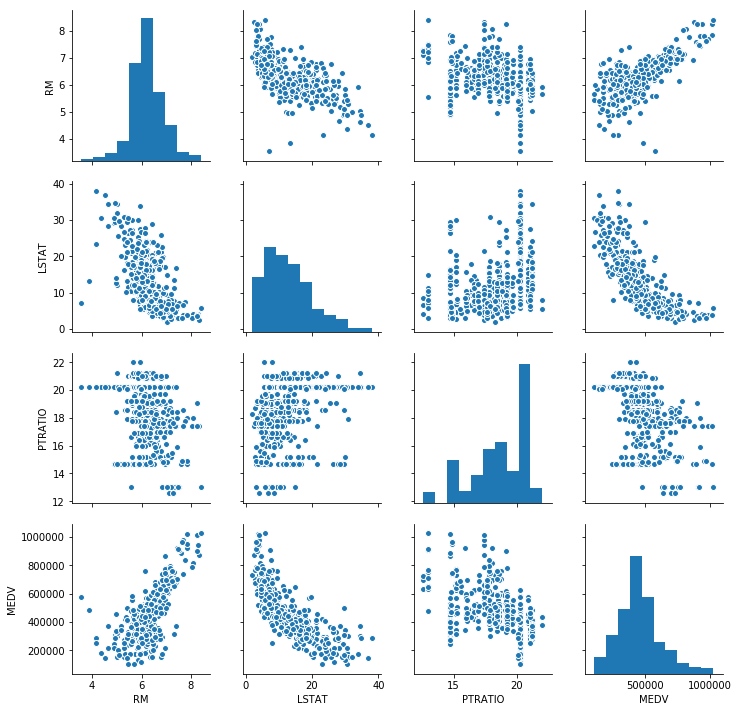

In [7]:
# Pair Plot
import seaborn as sns
sns.pairplot(data)

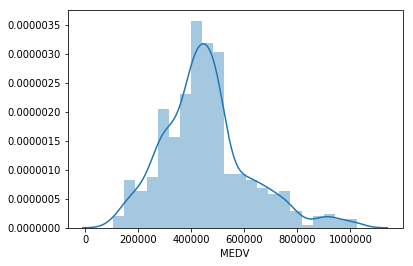

In [8]:
# Distplot
sns.distplot(data['MEDV'])

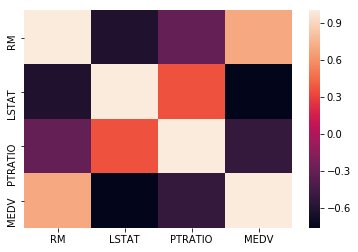

In [9]:
# Heatmap
sns.heatmap(data.corr())

# Model Building

In [10]:
y = data['MEDV']
X = data.drop('MEDV', axis = 1)

In [11]:
# Split data into train and test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

## Linear Regression

In [12]:
# Fitting simple linear regression to the training set
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train,)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

### Model Evaluation

In [13]:
# print the intercept
print(regressor.intercept_)

434789.45509552344


In [14]:
coeff_df = pd.DataFrame(regressor.coef_,X.columns,columns=['Coefficient'])
coeff_df

,Coefficient
RM,85325.364129
LSTAT,-10775.414793
PTRATIO,-20133.587791


In [15]:
# Predecting the Test set results
y_pred = regressor.predict(X_test)

In [16]:
y_pred

array([418504.52251533, 682498.59311161, 310842.03220354, 399602.67212048,
       529013.04970446, 364349.16756502, 241564.07559959, 413075.10184459,
       476051.89023052, 371925.92192458, 324382.18849665, 357068.87403347,
       472650.96518839,  52625.76046357, 486476.7874084 , 312653.08514703,
       465067.60969605, 614663.51972717, 383059.21254559, 653229.85415898,
       677008.34036381, 653364.33988067,  15201.46316315, 452877.56192735,
       360692.75896587, 754677.40725013, 714803.22773315, 754640.19558449,
       430756.93101727, 422579.57707332, 378309.3992427 , 461958.22362764,
       472103.18520444, 681780.56381622, 457070.41410848, 769207.31373834,
       520822.33816699, 261675.315203  , 503180.52774604, 590132.54786611,
       324624.03541901, 452521.53520288, 400704.94316867, 498314.39406844,
       280336.01343561, 365481.99718596, 525798.46427921, 361547.63013434,
       716795.14226269, 407424.79029782, 679886.98036124, 445827.68346551,
       614892.98134094, 3

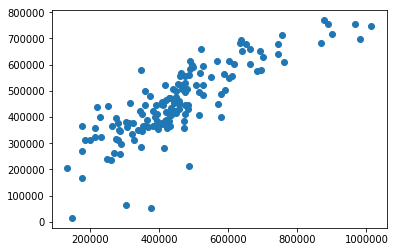

In [17]:
plt.scatter(y_test,y_pred)

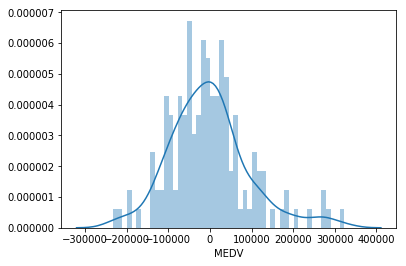

In [18]:
#Residual Histogram
sns.distplot((y_test-y_pred),bins=50)

### Regression Evaluation Metrics

In [19]:
from sklearn import metrics

In [20]:
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE: 71651.46435650408
MSE: 9232768512.151463
RMSE: 96087.2963099257


Predicted selling price for Client 1's home: $376,230.41
Predicted selling price for Client 2's home: $-11,661.29
Predicted selling price for Client 3's home: $843,463.07


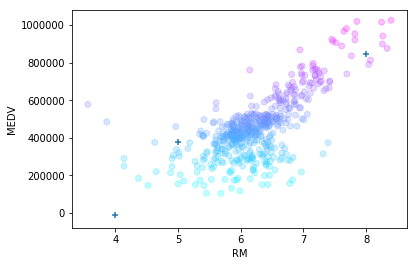

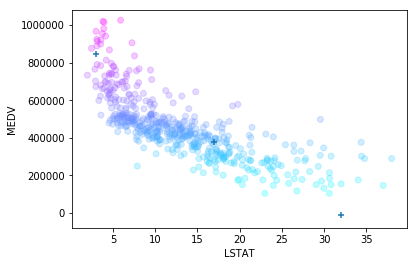

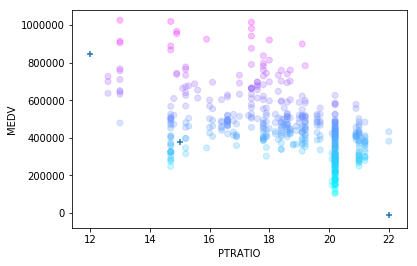

Features:
               RM       LSTAT     PTRATIO
count  489.000000  489.000000  489.000000
mean     6.240288   12.939632   18.516564
std      0.643650    7.081990    2.111268
min      3.561000    1.980000   12.600000
25%      5.880000    7.370000   17.400000
50%      6.185000   11.690000   19.100000
75%      6.575000   17.120000   20.200000
max      8.398000   37.970000   22.000000
Price:
count    4.890000e+02
mean     4.543429e+05
std      1.653403e+05
min      1.050000e+05
25%      3.507000e+05
50%      4.389000e+05
75%      5.187000e+05
max      1.024800e+06
Name: MEDV, dtype: float64


In [21]:
# Produce a matrix for client data
client_data = [[5, 17, 15], # Client 1
               [4, 32, 22], # Client 2
               [8, 3, 12]]  # Client 3

# Show predictions
for i, price in enumerate(regressor.predict(client_data)):
    print ("Predicted selling price for Client {}'s home: ${:,.2f}".format(i+1, price))
    
# Usinf Matploblib    
clients = np.transpose(client_data)
preds = regressor.predict(client_data)
for var, feat in enumerate(['RM', 'LSTAT', 'PTRATIO']):
    plt.scatter(X[feat], y, alpha=0.25, c=y, cmap=plt.cm.cool)
    plt.scatter(clients[var], preds, marker='+', linewidths=15)
    plt.xlabel(feat)
    plt.ylabel('MEDV')
    plt.show()
    
# Show descriptive statistics for each feature\n",
print ('Features:')
print (X.describe())
print ('Price:')
print (y.describe())

## Decision Tree Regression

In [22]:
# Fitting the DTR to the dataset
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(random_state = 0)
regressor.fit(X, y)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=0, splitter='best')

In [23]:
# Predecting the Test set results
y_pred = regressor.predict(X_test)
y_pred

array([ 417900.,  632100.,  281400.,  577500.,  474600.,  359100.,
        247800.,  474600.,  449400.,  411600.,  214200.,  214200.,
        428400.,  375900.,  577500.,  327600.,  420000.,  489300.,
        470400.,  640500.,  651000.,  690900.,  147000.,  441000.,
        367500.,  966000.,  756000.,  888300.,  455700.,  445200.,
        323400.,  455700.,  430500.,  867300.,  445200.,  875700.,
        415800.,  268800.,  590100.,  497700.,  231000.,  315000.,
        388500.,  449400.,  413700.,  352800.,  453600.,  306600.,
        898800.,  514500.,  743400.,  474600.,  600600.,  304500.,
        661500.,  489300.,  422100.,  184800.,  525000.,  249900.,
        407400.,  361200.,  428400.,  392700.,  428400.,  472500.,
        258300.,  550200.,  346500.,  199500.,  302400.,  611100.,
        396900.,  585900.,  279300.,  483000.,  462000.,  218400.,
        518700.,  420000.,  392700.,  980700.,  455700.,  514500.,
        480900.,  520800.,  485100.,  525000.,  390600.,  5691

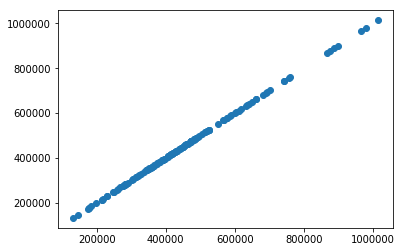

In [24]:
plt.scatter(y_test,y_pred)

/home/shrikant/anaconda3/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:494: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X,a,b,gridsize)/(delta*nobs)
/home/shrikant/anaconda3/lib/python3.6/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
/home/shrikant/anaconda3/lib/python3.6/site-packages/numpy/core/_methods.py:26: RuntimeWarning: invalid value encountered in reduce
  return umr_maximum(a, axis, None, out, keepdims)


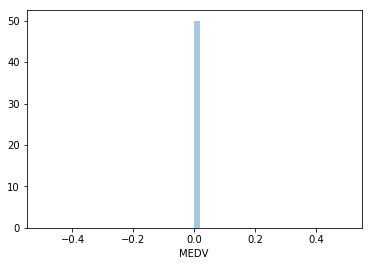

In [25]:
#Residual Histogram
sns.distplot((y_test-y_pred),bins=50)

In [26]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE: 0.0
MSE: 0.0
RMSE: 0.0


Predicted selling price for Client 1's home: $392,700.00
Predicted selling price for Client 2's home: $277,200.00
Predicted selling price for Client 3's home: $966,000.00


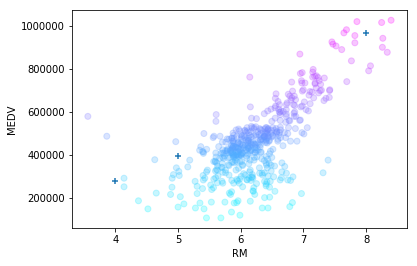

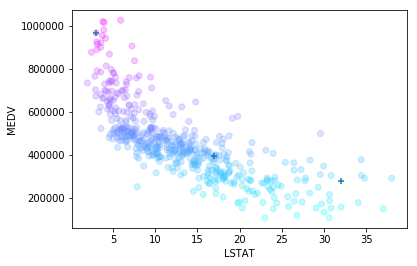

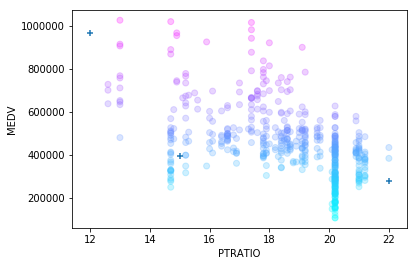

Features:
               RM       LSTAT     PTRATIO
count  489.000000  489.000000  489.000000
mean     6.240288   12.939632   18.516564
std      0.643650    7.081990    2.111268
min      3.561000    1.980000   12.600000
25%      5.880000    7.370000   17.400000
50%      6.185000   11.690000   19.100000
75%      6.575000   17.120000   20.200000
max      8.398000   37.970000   22.000000
Price:
count    4.890000e+02
mean     4.543429e+05
std      1.653403e+05
min      1.050000e+05
25%      3.507000e+05
50%      4.389000e+05
75%      5.187000e+05
max      1.024800e+06
Name: MEDV, dtype: float64


In [27]:
# Produce a matrix for client data
client_data = [[5, 17, 15], # Client 1
               [4, 32, 22], # Client 2
               [8, 3, 12]]  # Client 3

# Show predictions
for i, price in enumerate(regressor.predict(client_data)):
    print ("Predicted selling price for Client {}'s home: ${:,.2f}".format(i+1, price))
    
# Usinf Matploblib    
clients = np.transpose(client_data)
preds = regressor.predict(client_data)
for var, feat in enumerate(['RM', 'LSTAT', 'PTRATIO']):
    plt.scatter(X[feat], y, alpha=0.25, c=y, cmap=plt.cm.cool)
    plt.scatter(clients[var], preds, marker='+', linewidths=15)
    plt.xlabel(feat)
    plt.ylabel('MEDV')
    plt.show()
    
# Show descriptive statistics for each feature\n",
print ('Features:')
print (X.describe())
print ('Price:')
print (y.describe())

## Random Forest Regression

In [28]:
# Fitting Random Forest Regression to the dataset
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 300, random_state = 0)
regressor.fit(X,y)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=300, n_jobs=1,
           oob_score=False, random_state=0, verbose=0, warm_start=False)

In [29]:
# Predecting the Test set results
y_pred = regressor.predict(X_test)

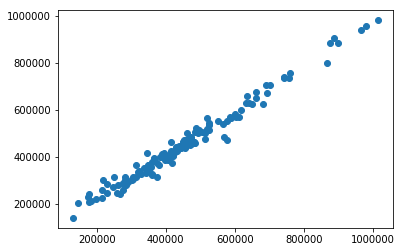

In [30]:
plt.scatter(y_test,y_pred)

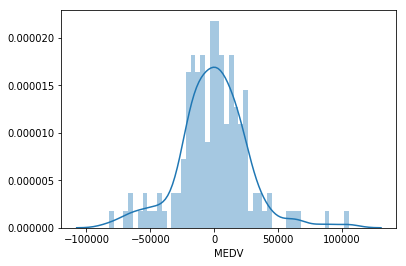

In [31]:
#Residual Histogram
sns.distplot((y_test-y_pred),bins=50)

In [32]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE: 19651.85714285714
MSE: 737858137.6666666
RMSE: 27163.544276597386


Predicted selling price for Client 1's home: $388,486.00
Predicted selling price for Client 2's home: $246,015.00
Predicted selling price for Client 3's home: $906,290.00


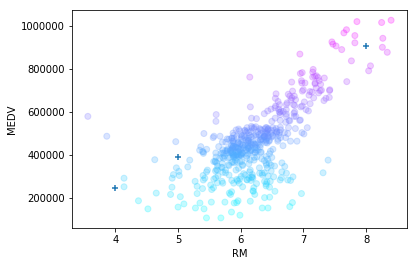

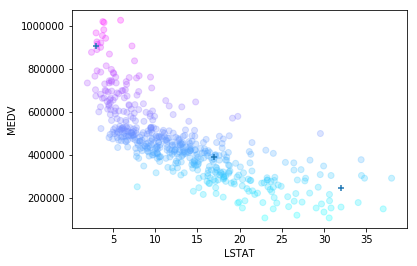

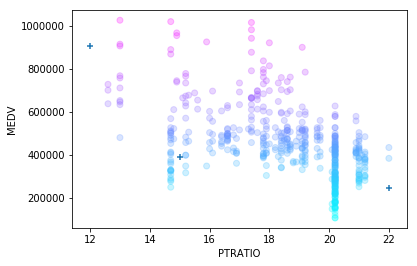

Features:
               RM       LSTAT     PTRATIO
count  489.000000  489.000000  489.000000
mean     6.240288   12.939632   18.516564
std      0.643650    7.081990    2.111268
min      3.561000    1.980000   12.600000
25%      5.880000    7.370000   17.400000
50%      6.185000   11.690000   19.100000
75%      6.575000   17.120000   20.200000
max      8.398000   37.970000   22.000000
Price:
count    4.890000e+02
mean     4.543429e+05
std      1.653403e+05
min      1.050000e+05
25%      3.507000e+05
50%      4.389000e+05
75%      5.187000e+05
max      1.024800e+06
Name: MEDV, dtype: float64


In [33]:
# Produce a matrix for client data
client_data = [[5, 17, 15], # Client 1
               [4, 32, 22], # Client 2
               [8, 3, 12]]  # Client 3

# Show predictions
for i, price in enumerate(regressor.predict(client_data)):
    print ("Predicted selling price for Client {}'s home: ${:,.2f}".format(i+1, price))
    
# Usinf Matploblib    
clients = np.transpose(client_data)
preds = regressor.predict(client_data)
for var, feat in enumerate(['RM', 'LSTAT', 'PTRATIO']):
    plt.scatter(X[feat], y, alpha=0.25, c=y, cmap=plt.cm.cool)
    plt.scatter(clients[var], preds, marker='+', linewidths=15)
    plt.xlabel(feat)
    plt.ylabel('MEDV')
    plt.show()
    
# Show descriptive statistics for each feature\n",
print ('Features:')
print (X.describe())
print ('Price:')
print (y.describe())